In [1]:
!nvidia-smi

Mon Jul 15 10:42:34 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/78.2 GB disk)


In [12]:
from ultralytics import YOLO

%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={HOME}/combined/data.yaml epochs=100 imgsz=640 batch=32 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 335MB/s]
New https://pypi.org/project/ultralytics/8.2.57 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/combined/data.yaml, epochs=100, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, l

In [13]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1721040737.9ceab207e9b8.3563.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch5670.jpg  weights
P_curve.png					    train_batch5671.jpg
PR_curve.png					    train_batch5672.jpg


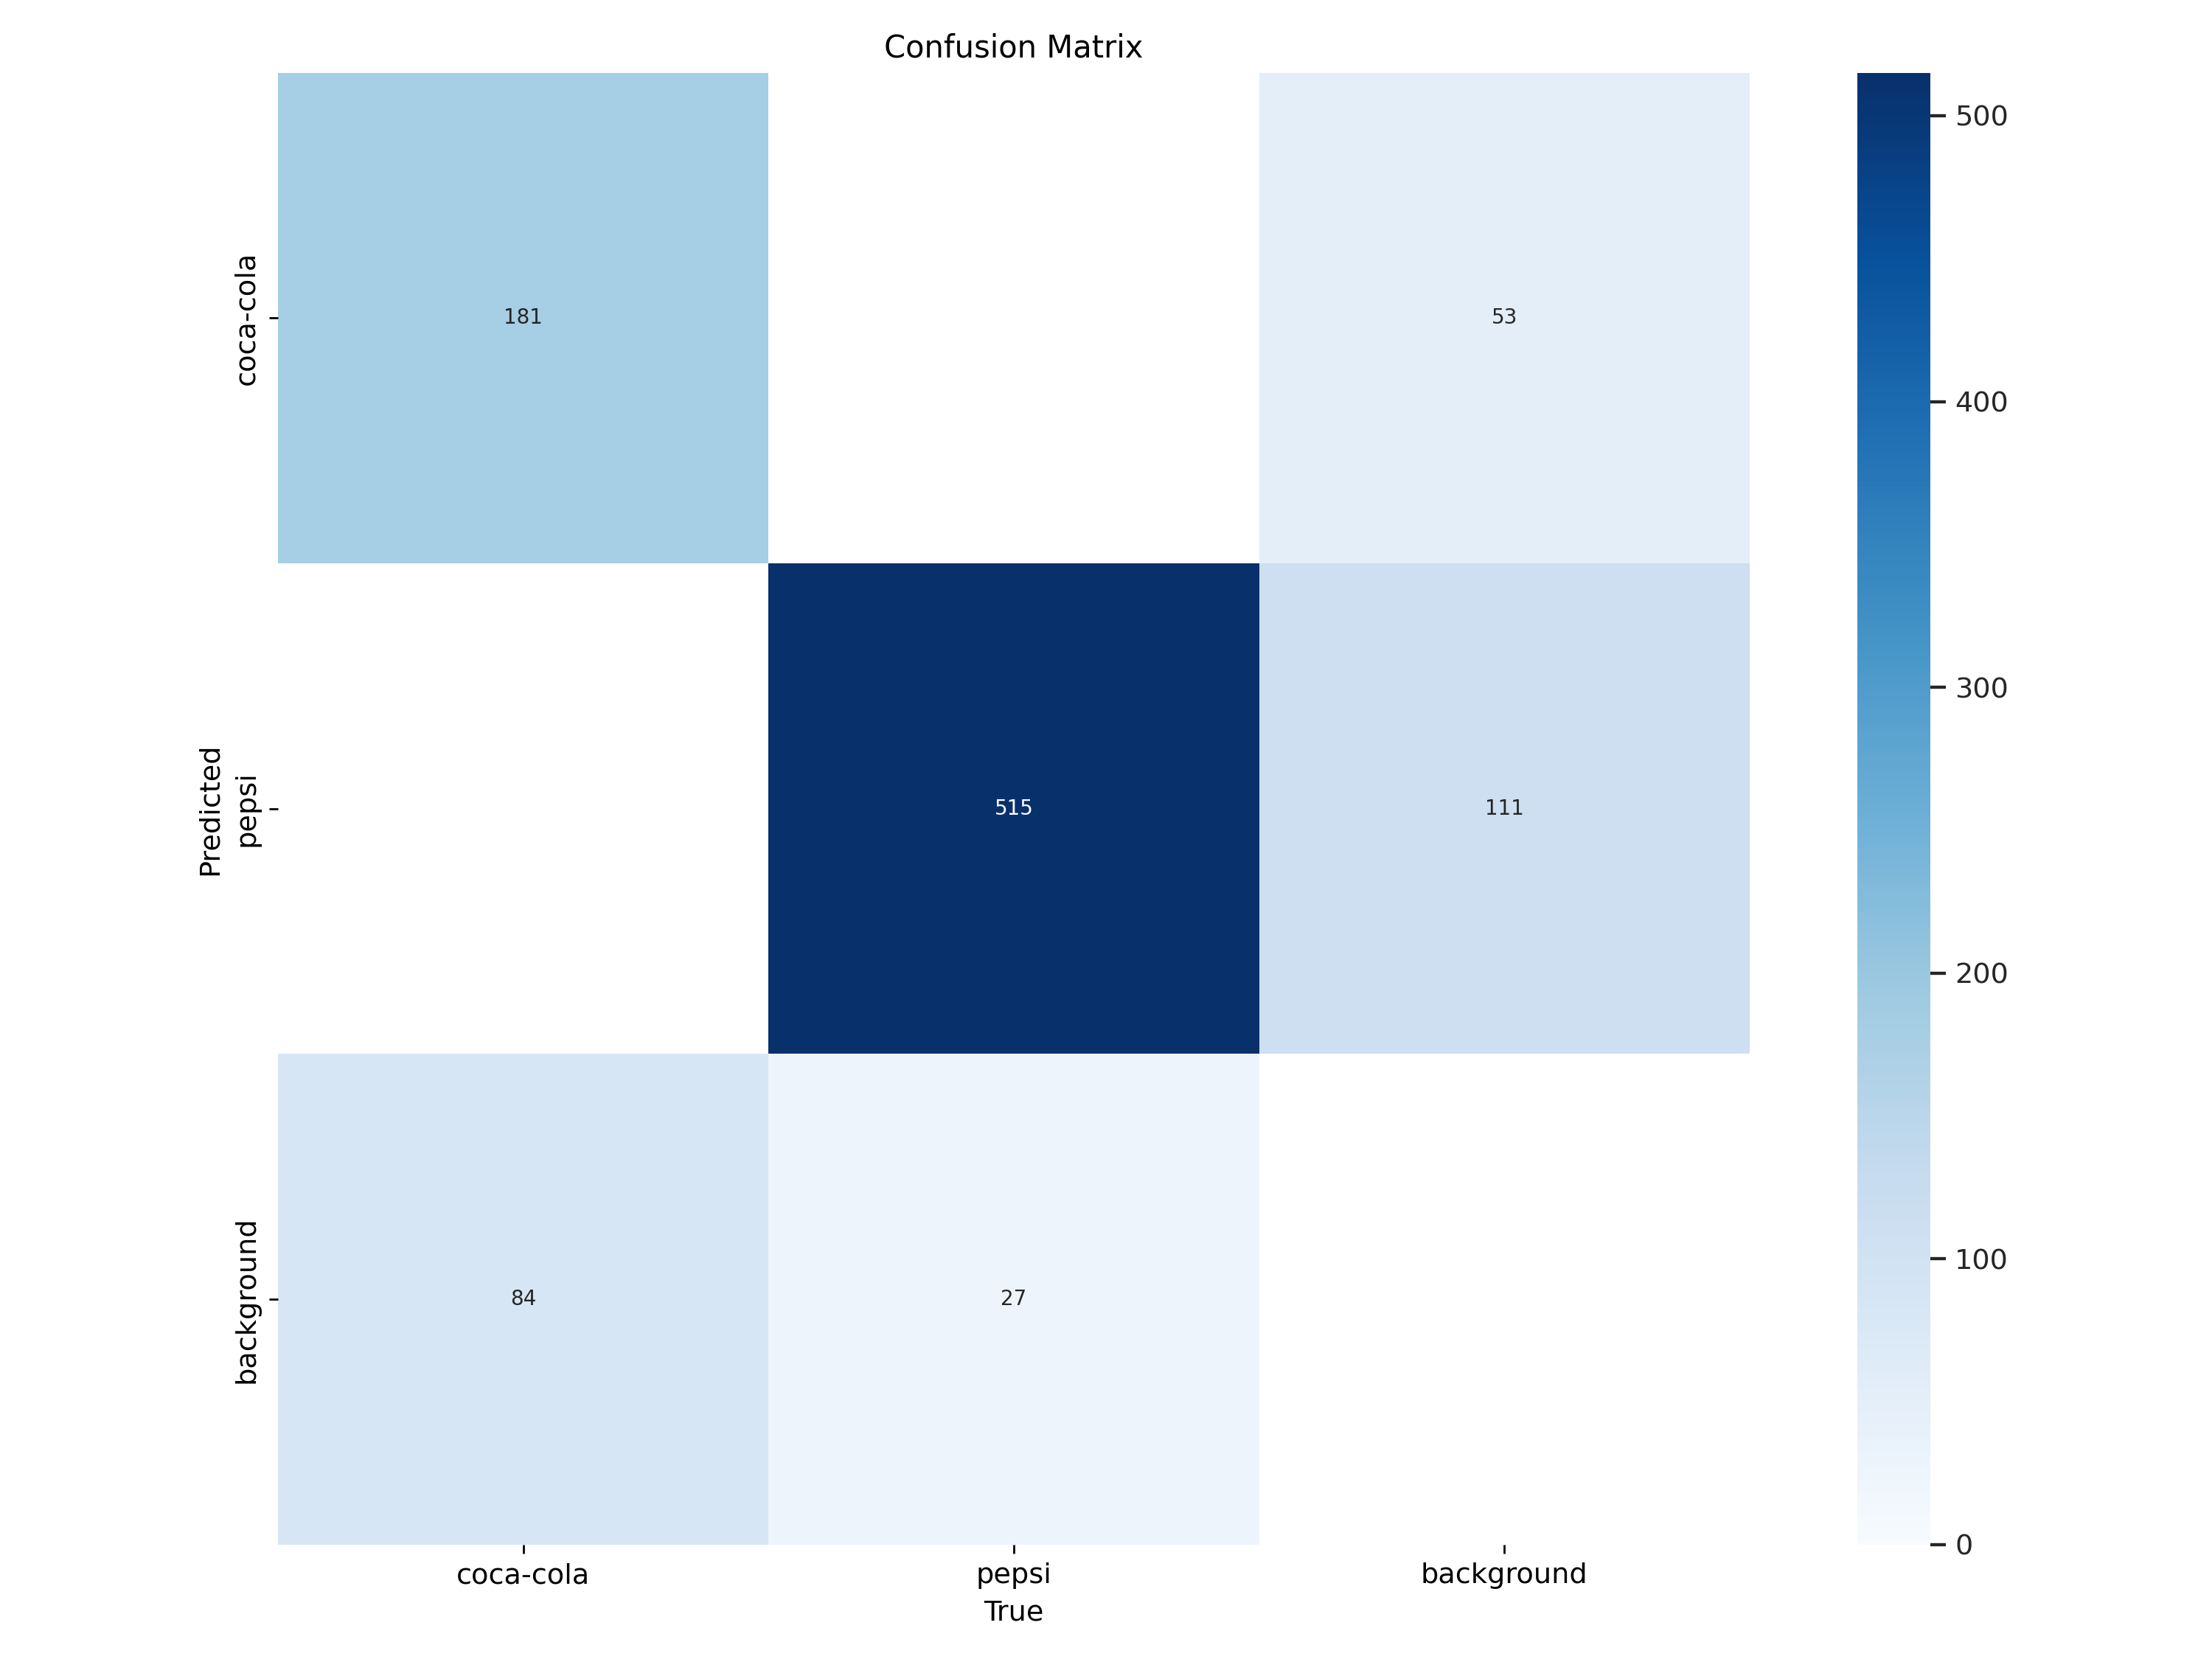

In [18]:
from IPython.display import Image, display
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)



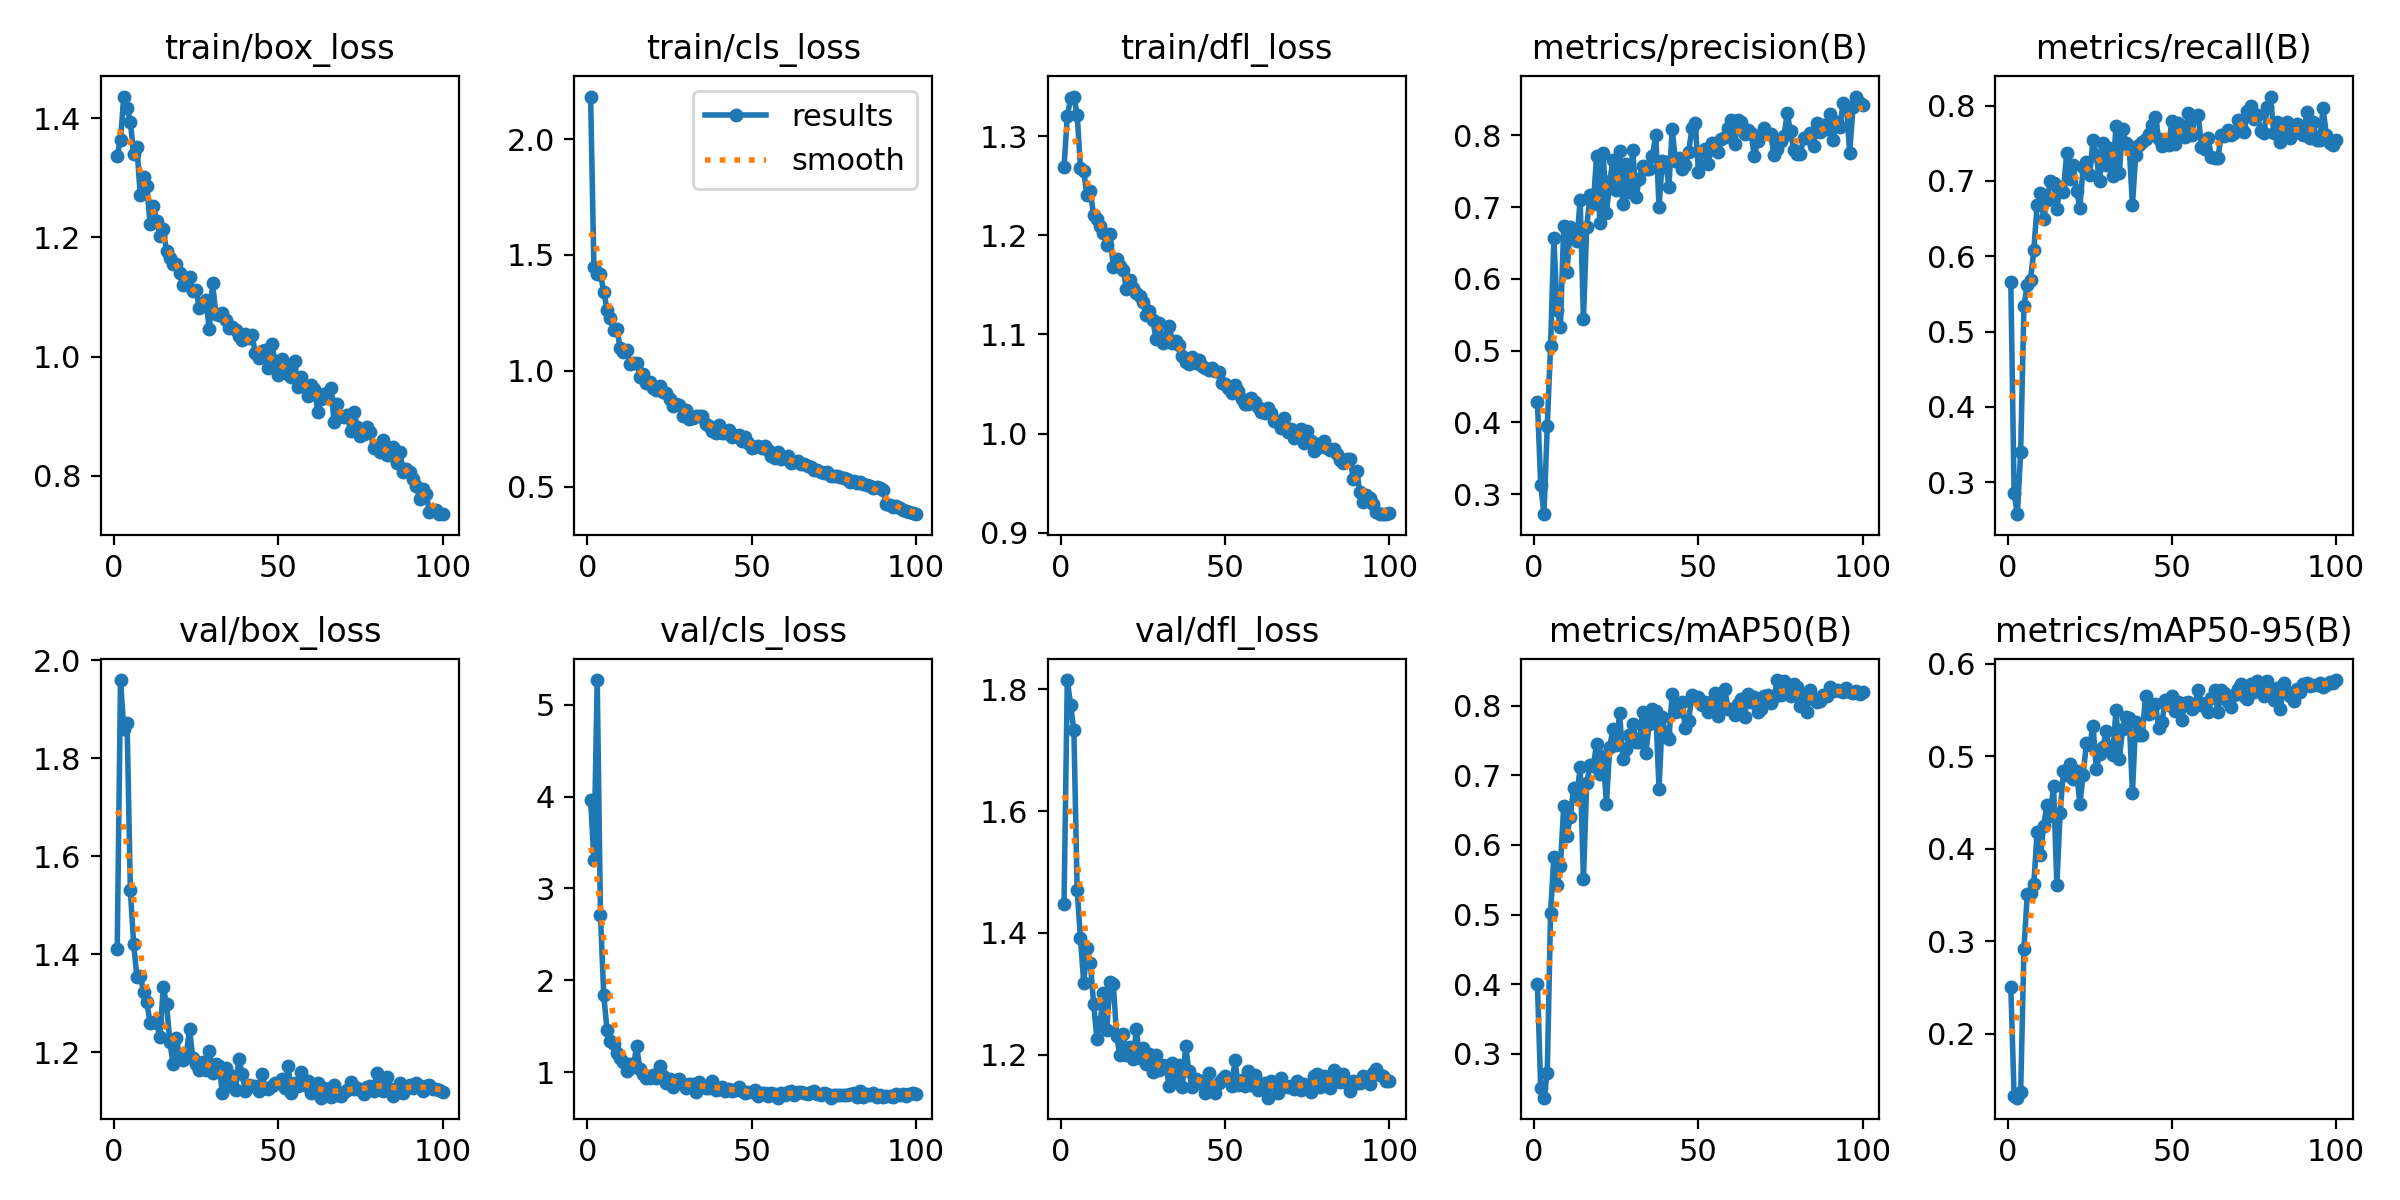

In [16]:
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

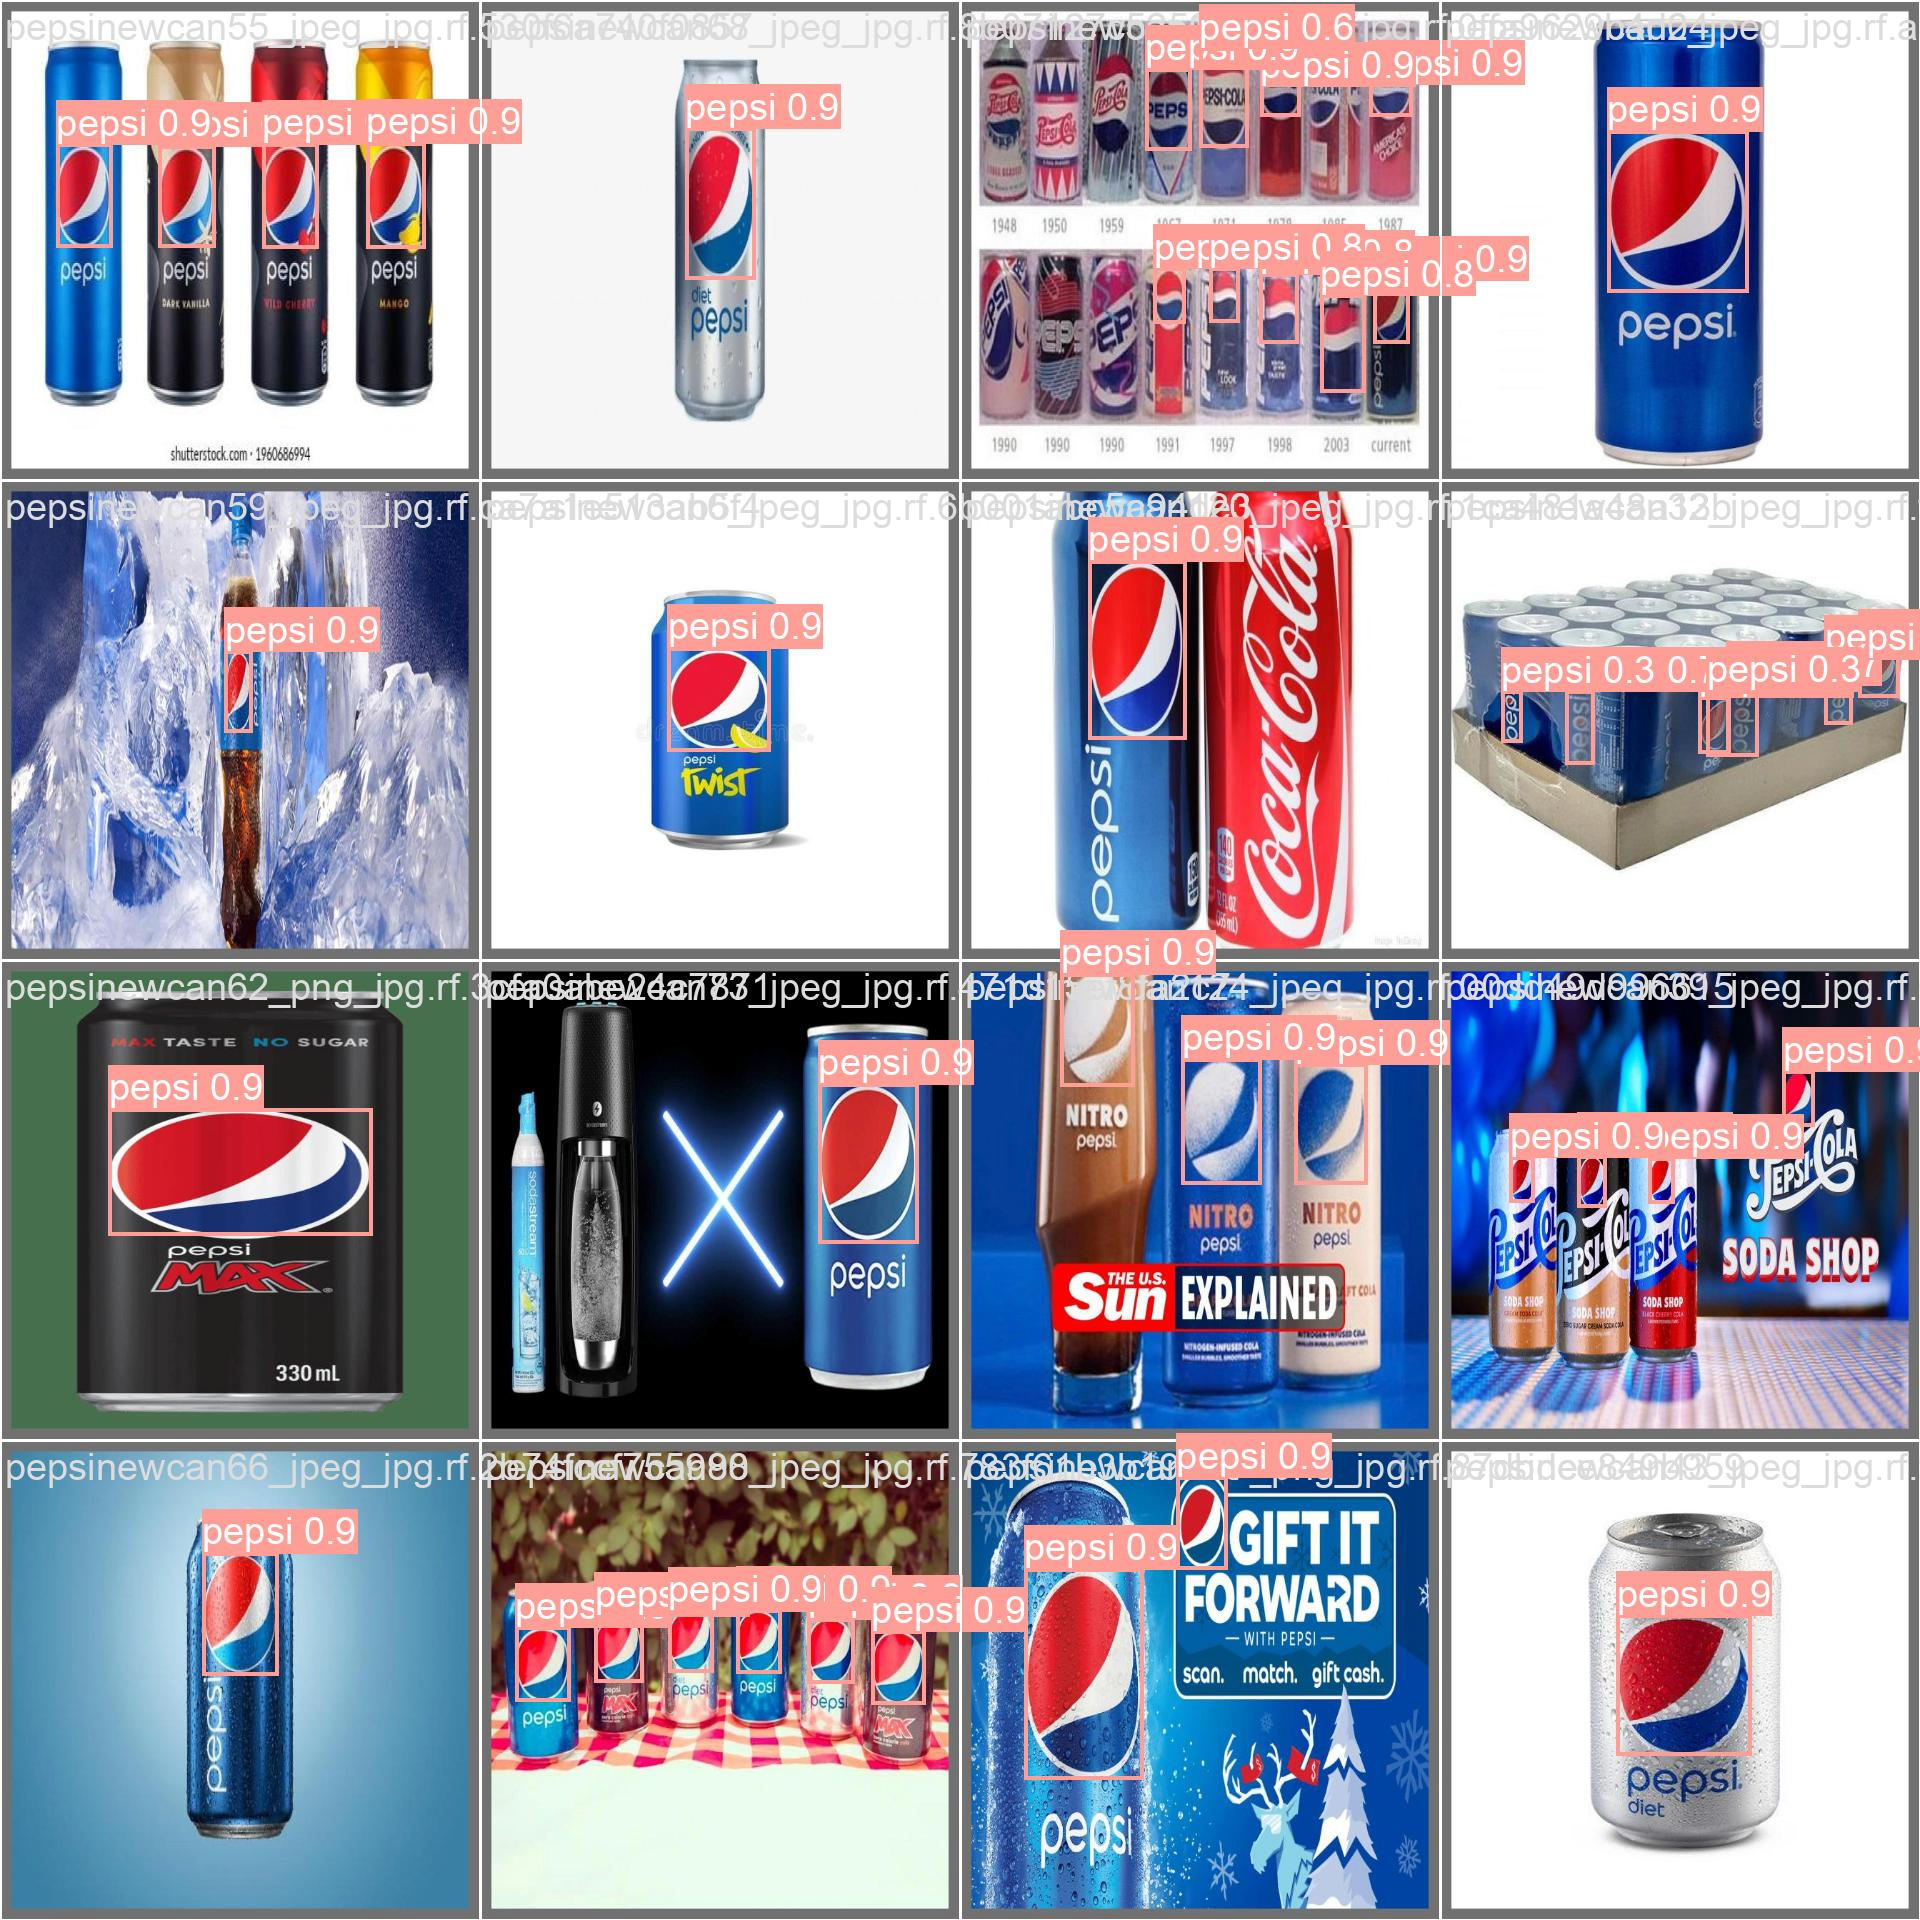

In [17]:
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [19]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={HOME}/combined/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/combined/valid/labels.cache... 399 images, 15 backgrounds, 0 corrupt: 100% 399/399 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 25/25 [00:08<00:00,  3.01it/s]
                   all        399        807      0.799      0.788      0.834      0.582
             coca-cola        399        265      0.757      0.649      0.732      0.468
                 pepsi        399        542      0.841      0.926      0.936      0.696
Speed: 0.5ms preprocess, 9.3ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [22]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={HOME}/combined/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/139 /content/combined/test/images/10608059_756337147755744_1283456693_n_jpg.rf.0da5856e28045b6cbfe31da29e01ddfb.jpg: 640x640 (no detections), 30.5ms
WARNING ⚠️ NMS time limit 0.550s exceeded
image 2/139 /content/combined/test/images/10623946_627288937390336_2139453859_n_jpg.rf.fb0e7c36752353eefe8fc2f6a593883c.jpg: 640x640 2 coca-colas, 24.4ms
image 3/139 /content/combined/test/images/11251836_898917010197073_1987282046_n_jpg.rf.c6a998d363e905a992f1b370ed500d54.jpg: 640x640 2 coca-colas, 16.3ms
image 4/139 /content/combined/test/images/11271141_131374647197130_2104068843_n_jpg.rf.eb47c7aa9fc5eaabb721d45849234896.jpg: 640x640 1 coca-cola, 16.3ms
image 5/139 /content/combined/test/images/11330811_1037683152910727_1182721745_n_jpg.rf.c7f14d048c0cc0e1149a89918fbd3e0f.jpg: 640x640 1 coca-cola, 16.2ms
image 6

**NOTE:** Let's take a look at few results.

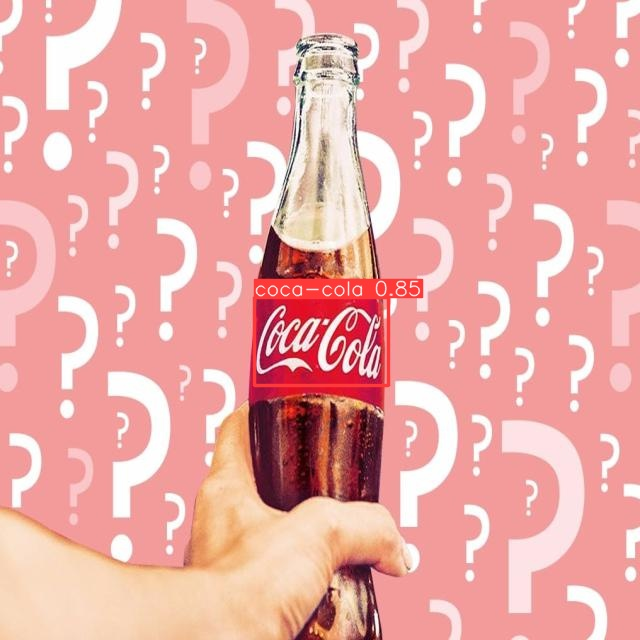

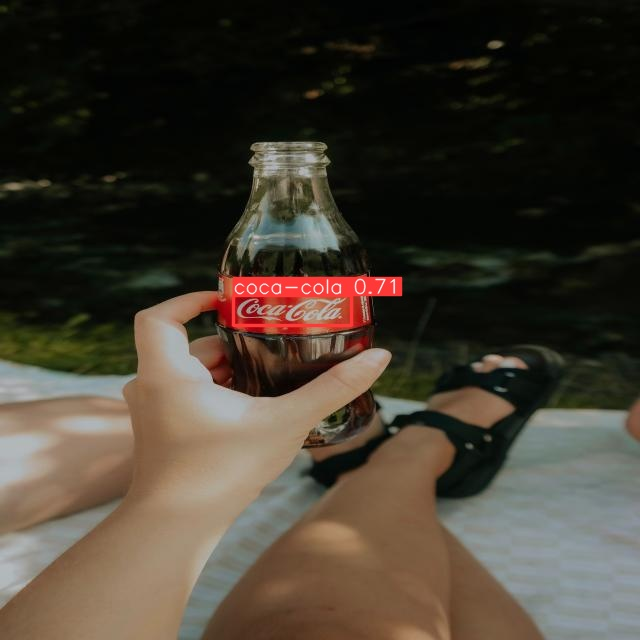

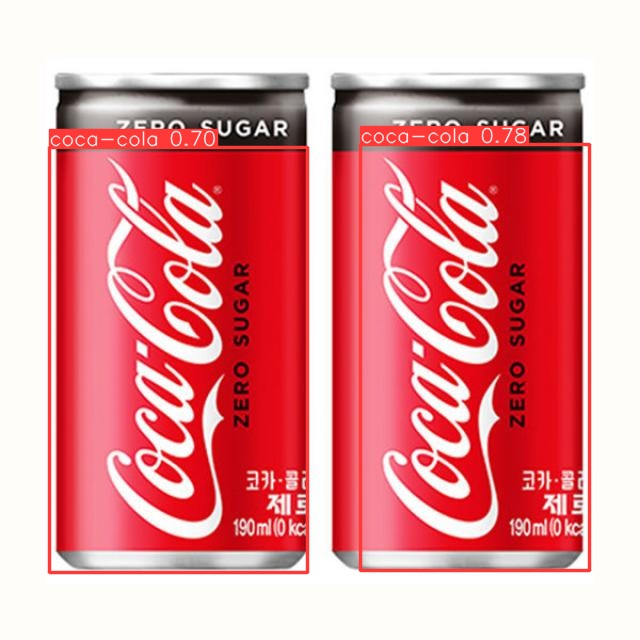

In [23]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [24]:
!mv /content/runs/detect/train/weights/best.pt /content/drive/MyDrive/